In [1]:
from syntax.slide import Slide
from syntax.transformers.tissue_mask import OtsuTissueMask
from syntax.transformers.tiling import SimpleTiling
from syntax.transformers.utils import visualize_pipeline_results
from syntax.transformers.base import Pipeline


import matplotlib.pyplot as plt
import glob
import os
import numpy as np
from PIL import Image
%matplotlib inline

def show_PIL(pil_im, size=5):
    '''A function to show PIL images in the notebook.'''
    plt.figure(figsize=(size,size))
    plt.axis('off')
    plt.imshow(np.asarray(pil_im),cmap='gray')

In [2]:
slide_path = "/home/jevjev/Dropbox/Projects/wsi-syntax-test/TCGA-AC-A5XU-01Z-00-DX1.1AEEFAAF-0906-4086-8022-13B689FAB9F5.svs"


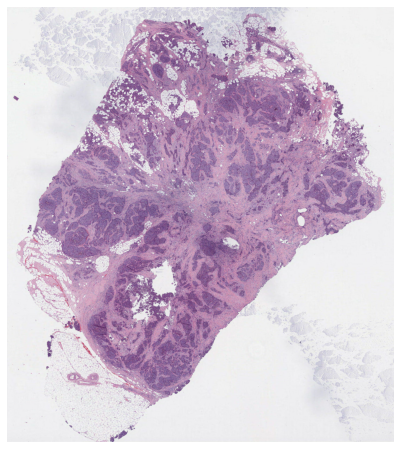

In [3]:
slide = Slide(slide_path=slide_path)

thumb = slide.get_thumbnail(size=(3000,3000))
show_PIL(thumb, size=8)

In [4]:
steps = [OtsuTissueMask(), SimpleTiling(magnification=40, 
                                                  tile_size=224, 
                                                  max_per_class=50)]
pipeline = Pipeline(steps)

In [5]:
slide = pipeline.fit_transform(slide)

/home/jevjev/Dropbox/Projects/wsi-syntax/syntax/transformers/tiling/tiling.py:214: UserWarning: TCGA-AC-A5XU-01Z-00-DX1.1AEEFAAF-0906-4086-8022-13B689FAB9F5 slide does not have annotation mask supplied
  warnings.warn(warning_string)


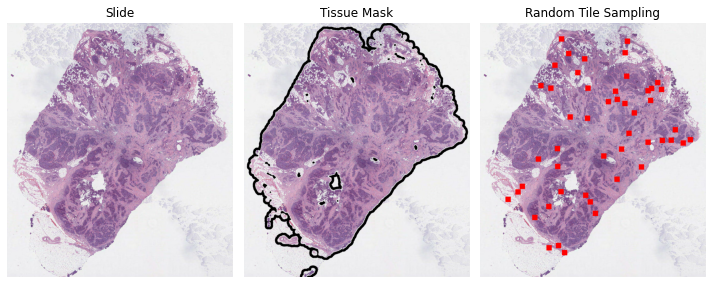

In [7]:
visualize_pipeline_results(slide, steps, title_list=['Tissue Mask', 'Random Tile Sampling'])
plt.tight_layout()
plt.savefig("simple_pipeline.png", dpi=200)